Cada semana, Spotify actualiza sus listas de las 50 canciones más populares para cada país. Este conjunto de datos incluye la lista de cada país correspondiente a la semana 45 de 2023 (del 6 de noviembre al 12 de noviembre). Hay 73 países disponibles.

El conjunto de datos tiene una columna para cada aspecto musical de cada canción, así como el nombre, el país, el artista y la fecha de publicación de la pista.

Con estos datos se podría tener información como preferencias de escucha por paises, para dar feedback a músicos y artista, recomendaciones ML, tipos de anuncios, etc...

Datos extraídos de la API oficial de Spotify.

*Datos extraidos de Kaggle: [+ Info](https://www.kaggle.com/datasets/miquelneck/worlds-spotify-top-50-playlist-musicality-data/data)

# Datos de musicalidad de la lista de reproducción de Spotify TOP-50 del mundo

Cada semana, Spotify actualiza sus listas de las 50 canciones más populares para cada país. Este conjunto de datos incluye la lista de cada país correspondiente a la **semana 45 de 2023** (del 6 de noviembre al 12 de noviembre). Hay un total de **73 países disponibles**.

El conjunto de datos contiene una columna para cada aspecto musical de cada canción, así como el **nombre**, **país**, **artista**, y **fecha de publicación** de cada pista.

Datos extraídos de la API oficial de Spotify.

*Data Set de Kaggle: [+ Info](https://www.kaggle.com/datasets/miquelneck/worlds-spotify-top-50-playlist-musicality-data/data)*

In [4]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. Cargar los datos de Spotify
df = pd.read_csv("/content/sample_data/Top-50-musicality-global.csv")
#df.info()
print("Resumen básico: ", f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}, Tipos: {df.dtypes.value_counts().to_dict()}")
#print("Resumen columnas y datos tipo: ", df.agg(['dtype', lambda x: x.isnull().sum()]).T.rename(columns={'dtype': 'Tipo', '<lambda_0>': 'Nulos'}))


Resumen básico:  Filas: 3589, Columnas: 21, Tipos: {dtype('float64'): 9, dtype('int64'): 6, dtype('O'): 6}


### 1.1 Visualización de los Datos

En esta sección se realiza una visualización inicial del dataset para comprender su estructura y contenido. Esta visualización permite identificar rápidamente aspectos como el número de filas y columnas, tipos de datos, y posibles valores faltantes (`NaN`).


In [5]:
df.describe(include= "all")

,Unnamed: 0,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
count,3589.000000,3589,3583,3583,3583,3589.000000,3589,3583,3589.000000,3589.000000,...,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000
unique,NaN,72,1841,1157,1545,NaN,590,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Global,greedy,Bad Bunny,nadie sabe lo que va a pasar mañana,NaN,2023-10-13,AR,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,50,44,163,153,NaN,221,3527,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1794.000000,NaN,NaN,NaN,NaN,78.451101,NaN,NaN,0.688079,0.285637,...,0.646463,0.019187,5.348008,0.171895,-6.616918,0.503483,0.105122,121.027742,3.906659,0.528968
std,1036.199386,NaN,NaN,NaN,NaN,15.242710,NaN,NaN,0.135642,0.258611,...,0.163505,0.094564,3.494953,0.123540,2.658782,0.500058,0.097852,27.624052,0.433971,0.228932
min,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.244000,0.000008,...,0.024200,0.000000,0.000000,0.015400,-19.518000,0.000000,0.023200,60.038000,1.000000,0.037300
25%,897.000000,NaN,NaN,NaN,NaN,67.000000,NaN,NaN,0.596000,0.079600,...,0.543000,0.000000,2.000000,0.097400,-8.065000,0.000000,0.039900,99.904000,4.000000,0.359000
50%,1794.000000,NaN,NaN,NaN,NaN,83.000000,NaN,NaN,0.706000,0.188000,...,0.669000,0.000001,5.000000,0.120000,-6.238000,1.000000,0.063300,118.024000,4.000000,0.524000
75%,2691.000000,NaN,NaN,NaN,NaN,90.000000,NaN,NaN,0.795000,0.441000,...,0.762000,0.000089,8.000000,0.214000,-4.813000,1.000000,0.131000,139.945000,4.000000,0.720000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3589 non-null   int64  
 1   Country           3589 non-null   object 
 2   Track Name        3583 non-null   object 
 3   Artist Name       3583 non-null   object 
 4   Album Name        3583 non-null   object 
 5   Popularity        3589 non-null   int64  
 6   Date              3589 non-null   object 
 7   Markets           3583 non-null   object 
 8   Danceability      3589 non-null   float64
 9   Acousticness      3589 non-null   float64
 10  duration          3589 non-null   int64  
 11  Energy            3589 non-null   float64
 12  Instrumentalness  3589 non-null   float64
 13  Key               3589 non-null   int64  
 14  Liveness          3589 non-null   float64
 15  Loudness          3589 non-null   float64
 16  Mode              3589 non-null   int64  


In [ ]:
# Mostrar las primeras 5 filas
print("Primeras filas del DataFrame:")
print(df.head(3))

# Separación visual
print("\n" + "*" * 266 + "\n")  # Imprime una línea de asteriscos

# Mostrar las últimas 5 filas
print("Últimas filas del DataFrame:")
print(df.tail(3))


Primeras filas del DataFrame:
   Unnamed: 0 Country            Track Name     Artist Name   Album Name  \
0           0  Global  Standing Next to You       Jung Kook       GOLDEN   
1           1  Global                greedy      Tate McRae       greedy   
2           2  Global           Si No Estás  iñigo quintero  Si No Estás   

   Popularity        Date Markets  Danceability  Acousticness  ...  Energy  \
0          91  2023-11-03      AR         0.711        0.0447  ...   0.809   
1         100  2023-09-15      AR         0.750        0.2560  ...   0.733   
2          99  2022-09-23      AR         0.537        0.8270  ...   0.421   

   Instrumentalness  Key  Liveness  Loudness  Mode  Speechiness    Tempo  \
0               0.0    2     0.339    -4.389     0       0.0955  106.017   
1               0.0    6     0.114    -3.180     0       0.0319  111.018   
2               0.0    5     0.138    -8.720     1       0.0285   98.224   

   TSignature  Positiveness  
0           4    

### 1.2 Porcentaje de NaN por Columna

La mayoría de las columnas no presentan un porcentaje de `NaN` muy representativo, por lo que podemos asumir la desviación. Sin embargo, la columna **Date** tiene un amplio porcentaje de `NaN` (casi un 60%), y el rango de fechas abarca aproximadamente **81 años** en lugar de una semana, lo cual hace que este dato no sea consistente.

Dejamos de momento este valor, por si se encuentra algún patrón a posteriori.


In [ ]:
# Calcular el porcentaje de NaN en todas las columnas, incluyendo 'Date'
porcentaje_nan = df.isnull().mean() * 100

# Filtrar solo las columnas con NaN y ordenarlas en orden descendente
porcentaje_nan = porcentaje_nan[porcentaje_nan > 0].sort_values(ascending=False)

# Imprimir el porcentaje de NaN de todas las columnas con valores faltantes
print("Porcentaje de NaN en todas las columnas con valores faltantes:")
print(porcentaje_nan)

Porcentaje de NaN en todas las columnas con valores faltantes:
Track Name     0.167177
Artist Name    0.167177
Album Name     0.167177
Markets        0.167177
dtype: float64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')# Convertir la columna 'Date' a datetime, estableciendo NaT en valores no convertibles

print("Valores NaT en 'Date':", df['Date'].isna().sum())# Contar valores NaT (nulos) en la columna 'Date'
print("Fecha mínima:", df['Date'].min())
print("Fecha máxima:", df['Date'].max())

Valores NaT en 'Date': 21
Fecha mínima: 1942-01-01 00:00:00
Fecha máxima: 2023-11-08 00:00:00


In [ ]:
# Definir el rango de fechas para la semana 45 de 2023
fecha_inicio = '2023-11-06'
fecha_fin = '2023-11-12'

# Filtrar fechas dentro del rango y contar
fechas_en_semana_45 = df['Date'].between(fecha_inicio, fecha_fin).sum()
print(f"Fechas dentro de la semana 45 de 2023: {fechas_en_semana_45}")

# Contar las fechas que están fuera del rango especificado
fechas_fuera_semana_45 = (~df['Date'].between(fecha_inicio, fecha_fin)).sum()

print(f"Fechas fuera de la semana 45 de 2023: {fechas_fuera_semana_45}")

Fechas dentro de la semana 45 de 2023: 8
Fechas fuera de la semana 45 de 2023: 3581


## 2. Limpieza y Preprocesamiento de Datos

Los datos están bastante limpios, pero realizaré algunos cambios de tipos y formato como práctica:

- **Convertir la columna de duración** al formato `hh:mm:ss`.
- **Cambiar el nombre del artista** a mayúsculas.
- **Eliminar caracteres especiales** sueltos (como corchetes).



2.1 Cambiar el Formato de `ms` a `hh:mm:ss` en la Columna `duration`

Se convierte la columna `duration`, que está en milisegundos (`ms`), al formato `hh:mm:ss` para mejorar la legibilidad.


In [ ]:
# Convertir la columna 'duration' de milisegundos a timedelta y redondear al segundo más cercano
df['duration_hhmmss'] = pd.to_timedelta(df['duration'], unit='ms').round('s')

# Aplicar formato hh:mm:ss para todos los valores
df['duration_hhmmss'] = df['duration_hhmmss'].apply(lambda x: (pd.Timestamp(0) + x).strftime('%H:%M:%S'))

# Mostrar el resultado
print(df[['duration', 'duration_hhmmss']])


      duration duration_hhmmss
0       206020        00:03:26
1       131872        00:02:11
2       184061        00:03:04
3       183551        00:03:03
4       229478        00:03:49
...        ...             ...
3584    175912        00:02:55
3585    133562        00:02:13
3586    179164        00:02:59
3587    167247        00:02:47
3588    234000        00:03:54

[3589 rows x 2 columns]


## 2.2 Recategorización de columnas `Alta`, `Media`, o `Baja`

Vamos a agregar una nueva columna para cada variable que esté en el rango de `0.0` a `1.0`. Los valores cercanos a `1.0` se clasificarán como `Alta`, mientras que los valores bajos se clasificarán como `Baja`. A cada nueva columna le añadiremos el sufijo `_cat`.




In [ ]:
import pandas as pd

class DataCategorizer:
    def __init__(self, df):
        self.df = df

    # Método para categorizar variables en Baja, Media, Alta
    def categorizar_valor(self, column):
        def categorize(valor):
            if valor < 0.33:
                return 'Baja'
            elif valor < 0.66:
                return 'Media'
            else:
                return 'Alta'

        # Crear una nueva columna con el sufijo '_cat'
        self.df[f'{column}_cat'] = self.df[column].apply(categorize)

    # Método para categorizar el compás en Regular o Irregular
    def clasificar_compas(self, column='Time_signature'):
        def categorize_compas(time_signature):
            if time_signature in [3, 4]:
                return 'Regular'
            elif time_signature in [5, 6, 7]:
                return 'Irregular'
            else:
                return 'Desconocido'

        # Crear la nueva columna 'Ritmo'
        self.df['Ritmo'] = self.df[column].apply(categorize_compas)

    # Método para aplicar todas las categorizaciones
    def aplicar_categorizaciones(self):
        # Columnas en el rango 0.0 a 1.0 que queremos categorizar
        columnas_categorizar = [
            'Danceability', 'Acousticness', 'Energy', 'Instrumentalness',
            'Liveness', 'Speechiness', 'Positiveness', 'Popularity', 'Loudness'
        ]
        for col in columnas_categorizar:
            if col in self.df.columns:
                self.categorizar_valor(col)

        # Clasificar el compás
        if 'Time_signature' in self.df.columns:
            self.clasificar_compas()

# Crear una instancia de la clase y aplicar las categorizaciones
categorizer = DataCategorizer(df)
categorizer.aplicar_categorizaciones()

# Verificar el resultado
print(df.head())


   Unnamed: 0 Country                                         Track Name  \
0           0  Global                               Standing Next to You   
1           1  Global                                             greedy   
2           2  Global                                        Si No Estás   
3           3  Global                Seven (feat. Latto) (Explicit Ver.)   
4           4  Global  Is It Over Now? (Taylor's Version) (From The V...   

      Artist Name               Album Name  Popularity       Date Markets  \
0       Jung Kook                   GOLDEN          91 2023-11-03      AR   
1      Tate McRae                   greedy         100 2023-09-15      AR   
2  iñigo quintero              Si No Estás          99 2022-09-23      AR   
3       Jung Kook                   GOLDEN          82 2023-11-03      AR   
4    Taylor Swift  1989 (Taylor's Version)          93 2023-10-26      AR   

   Danceability  Acousticness  ...  duration_hhmmss  Danceability_cat  \
0      

In [ ]:
# Eliminar las columnas especificadas
columnas_a_eliminar = ['Danceability', 'Acousticness', 'Energy', 'Instrumentalness', 'Liveness', 'Speechiness', 'Positiveness', 'Popularity', 'Loudness']
df = df.drop(columns=columnas_a_eliminar)

# Verificar que las columnas fueron eliminadas
print(df.head())

   Unnamed: 0 Country                                         Track Name  \
0           0  Global                               Standing Next to You   
1           1  Global                                             greedy   
2           2  Global                                        Si No Estás   
3           3  Global                Seven (feat. Latto) (Explicit Ver.)   
4           4  Global  Is It Over Now? (Taylor's Version) (From The V...   

      Artist Name               Album Name       Date Markets  duration  Key  \
0       Jung Kook                   GOLDEN 2023-11-03      AR    206020    2   
1      Tate McRae                   greedy 2023-09-15      AR    131872    6   
2  iñigo quintero              Si No Estás 2022-09-23      AR    184061    5   
3       Jung Kook                   GOLDEN 2023-11-03      AR    183551   11   
4    Taylor Swift  1989 (Taylor's Version) 2023-10-26      AR    229478    0   

   Mode  ...  duration_hhmmss  Danceability_cat Acousticness_c

In [ ]:
#se renombran los títulos de columnas
nuevos_nombres = {
    'Danceability_cat': 'Danceability (R)',
    'Acousticness_cat': 'Acousticness (R)',
    'Energy_cat': 'Energy (R)',
    'Instrumentalness_cat': 'Instrumentalness (R)',
    'Liveness_cat': 'Liveness (R)',
    'Speechiness_cat': 'Speechiness (R)',
    'Positiveness_cat': 'Positiveness (R)',
    'Popularity_cat': 'Popularity (R)',
    'Loudness_cat': 'Loudness (R)'
}

# Renombrar las columnas en el DataFrame
df = df.rename(columns=nuevos_nombres)

# Verificar los cambios
print(df.head())

   Unnamed: 0 Country                                         Track Name  \
0           0  Global                               Standing Next to You   
1           1  Global                                             greedy   
2           2  Global                                        Si No Estás   
3           3  Global                Seven (feat. Latto) (Explicit Ver.)   
4           4  Global  Is It Over Now? (Taylor's Version) (From The V...   

      Artist Name               Album Name       Date Markets  duration  Key  \
0       Jung Kook                   GOLDEN 2023-11-03      AR    206020    2   
1      Tate McRae                   greedy 2023-09-15      AR    131872    6   
2  iñigo quintero              Si No Estás 2022-09-23      AR    184061    5   
3       Jung Kook                   GOLDEN 2023-11-03      AR    183551   11   
4    Taylor Swift  1989 (Taylor's Version) 2023-10-26      AR    229478    0   

   Mode  ...  duration_hhmmss  Danceability (R) Acousticness (

2.1 Recategorizamos Mode (Emoción)

In [ ]:
# Crear una nueva columna 'Emocion' basada en el valor de 'Mode'
df['Emotion (Mode)'] = df['Mode'].apply(lambda x: 'Alegre' if x == 1 else 'Melancólica')

# Verificar el resultado
print(df[['Mode', 'Emotion (Mode)']])

      Mode Emotion (Mode)
0        0    Melancólica
1        0    Melancólica
2        1         Alegre
3        1         Alegre
4        1         Alegre
...    ...            ...
3584     1         Alegre
3585     0    Melancólica
3586     1         Alegre
3587     0    Melancólica
3588     1         Alegre

[3589 rows x 2 columns]


2.2 Recategorizamos el Tempo

In [ ]:
# Función para categorizar el tempo
def clasificar_tempo(tempo):
    if tempo < 90:
        return 'Lento'
    elif 90 <= tempo <= 120:
        return 'Moderado'
    else:
        return 'Rápido'

# Aplicar la función de clasificación de tempo y crear la nueva columna 'Tempo_cat'
df['Tempo (R)'] = df['Tempo'].apply(clasificar_tempo)

# Verificar el resultado
print(df[['Tempo', 'Tempo (R)']].head())

     Tempo Tempo (R)
0  106.017  Moderado
1  111.018  Moderado
2   98.224  Moderado
3  124.987    Rápido
4  100.012  Moderado


2.3 Time_Signature

In [ ]:
# Función para clasificar compases en Regular e Irregular
def clasificar_compas(ts):
    if ts in [3, 4]:
        return 'Regular'
    else:
        return 'Irregular'

# Crear una nueva columna 'TSignature (R)' con esta clasificación
df['TSignature (R)'] = df['TSignature'].apply(clasificar_compas)


In [ ]:
# Eliminar la columna original 'Tempo'
df = df.drop(columns=['Tempo', 'Mode', 'duration', 'TSignature'])



# 3. Análisis Exploratorio de Datos (EDA)


Empezamos los gráficos

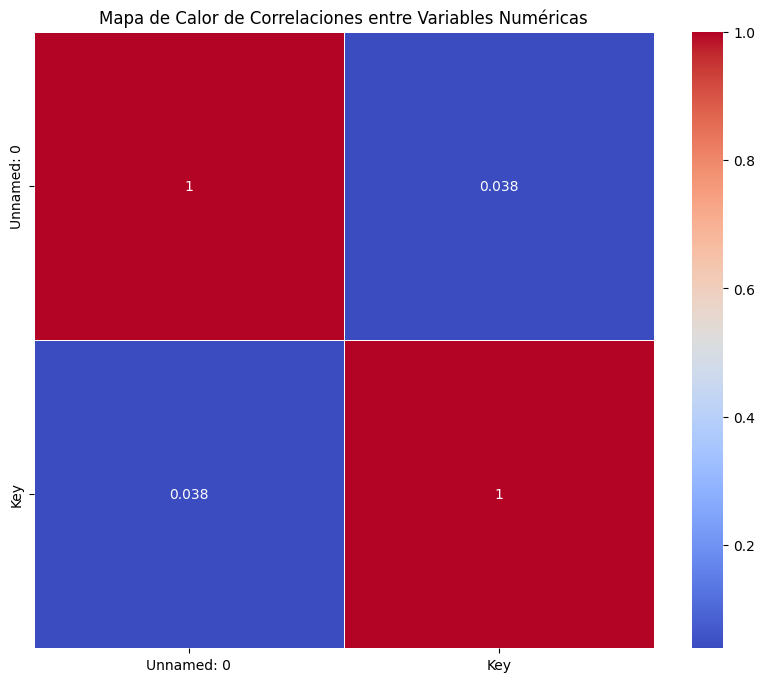

In [ ]:
# Seleccionar solo las columnas numéricas para el mapa de calor
datos_numericos = df.select_dtypes(include='number')

# Crear el mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(datos_numericos.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Unnamed: 0,3589.0,NaN,NaN,NaN,1794.0,0.0,897.0,1794.0,2691.0,3588.0,1036.199386
Country,3589,72,Global,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Track Name,3583,1841,greedy,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Artist Name,3583,1157,Bad Bunny,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Album Name,3583,1545,nadie sabe lo que va a pasar mañana,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,3568,NaN,NaN,NaN,2022-04-30 20:35:47.085201920,1942-01-01 00:00:00,2023-01-17 18:00:00,2023-07-21 00:00:00,2023-10-04 00:00:00,2023-11-08 00:00:00,NaN
Markets,3583,10,AR,3527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Key,3589.0,NaN,NaN,NaN,5.348008,0.0,2.0,5.0,8.0,11.0,3.494953
duration_hhmmss,3589,259,00:02:52,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Danceability (R),3589,3,Alta,2194,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Guardar el Dataset Final